In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data/DatalogWithoutGraph.csv', index_col = "sample")

In [3]:
data

,Time (s),CMD_POS_FLOATMAG_BH,ENC_POS_FLOATMAG_BH,POS_ERR_FLOATMAG_BH,DAC_FLOATMAG_BH,MODE_FLOATMAG_BH,ENC_POS_FLOATMAG_FBX,ENC_POS_FLOATMAG_FBY,ENC_POS_FLOATMAG_FB_COUNT,ENC_POS_FLOATMAG_FB_SCORE,EndPoint_X(um),ENC_X(um)
sample,,,,,,,,,,,,
0,0.000000,0,0,0,275,ff010001,6443008,5324800,15308,1,1.446250,0.000
1,0.000125,0,-5,5,287,ff010001,6443008,5324800,15308,1,1.446250,-0.025
2,0.000250,0,-5,5,288,903000a,6455296,5345280,15309,1,1.563439,-0.025
3,0.000375,0,-6,6,347,903000a,6455296,5345280,15309,1,1.563439,-0.030
4,0.000500,2,-6,8,511,903000a,6455296,5345280,15309,1,1.563439,-0.030
...,...,...,...,...,...,...,...,...,...,...,...,...
1717,0.214625,0,-12,12,-231,ff010001,6008832,5402624,15612,1,-2.694438,-0.060
1718,0.214750,0,-12,12,-215,ff010001,6008832,5402624,15612,1,-2.694438,-0.060
1719,0.214875,0,-12,12,-194,ff010001,6057984,5398528,15613,1,-2.225681,-0.060


Text(0, 0.5, 'ENC_X(um)')

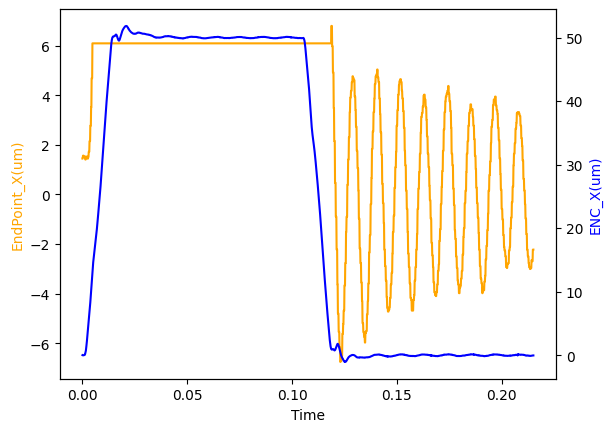

In [4]:
fix, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(data["Time (s)"].values, data["EndPoint_X(um)"].values, "orange")
ax2.plot(data["Time (s)"].values, data["ENC_X(um)"].values, "b")

ax1.set_xlabel('Time')
ax1.set_ylabel('EndPoint_X(um)', color='orange')
ax2.set_ylabel('ENC_X(um)', color='b')

In [5]:
#ok so my undersanding of the graph
# 0 - 0.1048 seconds is the machine setteling into the starting position 10000, (at 10000 for CMD_POS_FLOATMAG_BH)
# starting from 0.1049 to 0.1191 the machine is commanded to move to 0 (0 for CMD_POS_FLOATMAG_BH)
# This is the 'force input'
#lets restrict our time frame so that it only represents 0.1049 onwards


In [6]:
# np.where(data["Time (s)"] > 0.1048)[0][0]
#839th time index is the time of intial force application (movement)

Text(0, 0.5, 'ENC_X(um)')

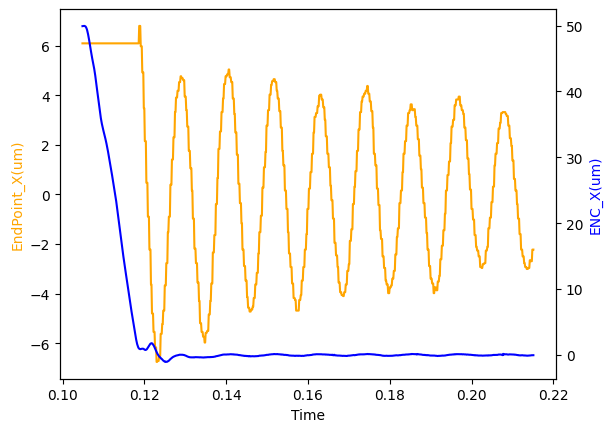

In [7]:
fix, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(data["Time (s)"].iloc[839:].values, data["EndPoint_X(um)"].iloc[839:].values, "orange")
ax2.plot(data["Time (s)"].iloc[839:].values, data["ENC_X(um)"].iloc[839:].values, "b")

ax1.set_xlabel('Time')
ax1.set_ylabel('EndPoint_X(um)', color='orange')
ax2.set_ylabel('ENC_X(um)', color='b')

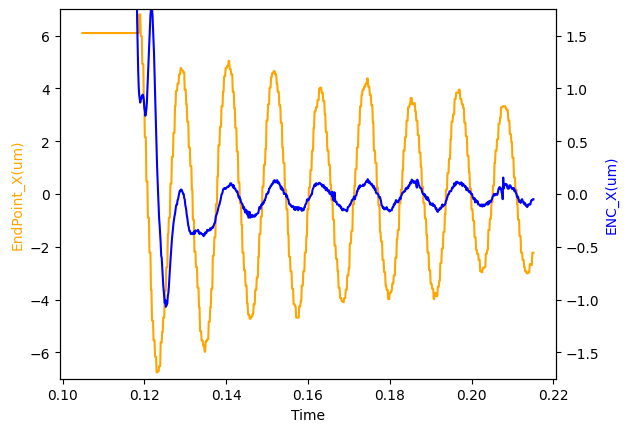

In [8]:
#changing the y axis limits

fix, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(data["Time (s)"].iloc[839:].values, data["EndPoint_X(um)"].iloc[839:].values, "orange")
ax2.plot(data["Time (s)"].iloc[839:].values, data["ENC_X(um)"].iloc[839:].values, "b")

#would like to set ylims
ylim = 7

ax1.set_ylim(-ylim, ylim)
ax2.set_ylim(-ylim / 4, ylim / 4)


ax1.set_xlabel('Time')
ax1.set_ylabel('EndPoint_X(um)', color='orange')
ax2.set_ylabel('ENC_X(um)', color='b')

plt.show()


In [9]:
#Ok so we first need to understand the data columns


#info on the data columns:
#believe that CMD_POS_FLOATMAG_BH is the command position of the machine
#ENC_POS_FLOATMAG_BH is the measured encoder position of the machine
#POS_ERR_FLOATMAG_BH is the error between desired and actual positions (CMD_POS_FLOATMAG_BH - ENC_POS_FLOATMAG_BH)
#Not completely sure about DAC_FLOATMAG_BH, possibly the output of a digital to analog converter

#MODE_FLOATMAG_BH are hexadecimal values, and i think they indicate the status of the movement (ie when CMD_POS_FLOATMAG_BH starts to approach its target, this value changes, like it was 9030009
#for the longest time while approaching 10000, and we have even spacing between the CMD values, but when it changes to 903000d the spacing between values starts to decrease as it approaches the desired position )

#ENC_POS_FLOATMAG_FBX is the column used for the calculation of the endpoint position, so assume this is the camera sensor output used to measure the position of the endpoint
#ENC_POS_FLOATMAG_FBY think that this is the counterpart to the above column, but for the y axis
#ENC_POS_FLOATMAG_FB_COUNT is a count, dont know its use
#ENC_POS_FLOATMAG_FB_SCORE is a score of some sort, its value is just 1 the whole way so i dont think its useful

#the graph that came with the data was plotting EndPoint_X(um) and ENC_X(um)
#EndPoint_X(um) is calculayed by ENC_POS_FLOATMAG_FBX /65535*2.5/4-60
#ENC_X(um) is calculated by ENC_POS_FLOATMAG_BH*5/1000


#I think to further explore relationships maybe do a quick correleation matrix using seaborn
data.columns

Index(['Time (s)', 'CMD_POS_FLOATMAG_BH', 'ENC_POS_FLOATMAG_BH',
       'POS_ERR_FLOATMAG_BH', 'DAC_FLOATMAG_BH', 'MODE_FLOATMAG_BH',
       'ENC_POS_FLOATMAG_FBX', 'ENC_POS_FLOATMAG_FBY',
       'ENC_POS_FLOATMAG_FB_COUNT', 'ENC_POS_FLOATMAG_FB_SCORE',
       'EndPoint_X(um)', 'ENC_X(um)'],
      dtype='object')

<AxesSubplot:>

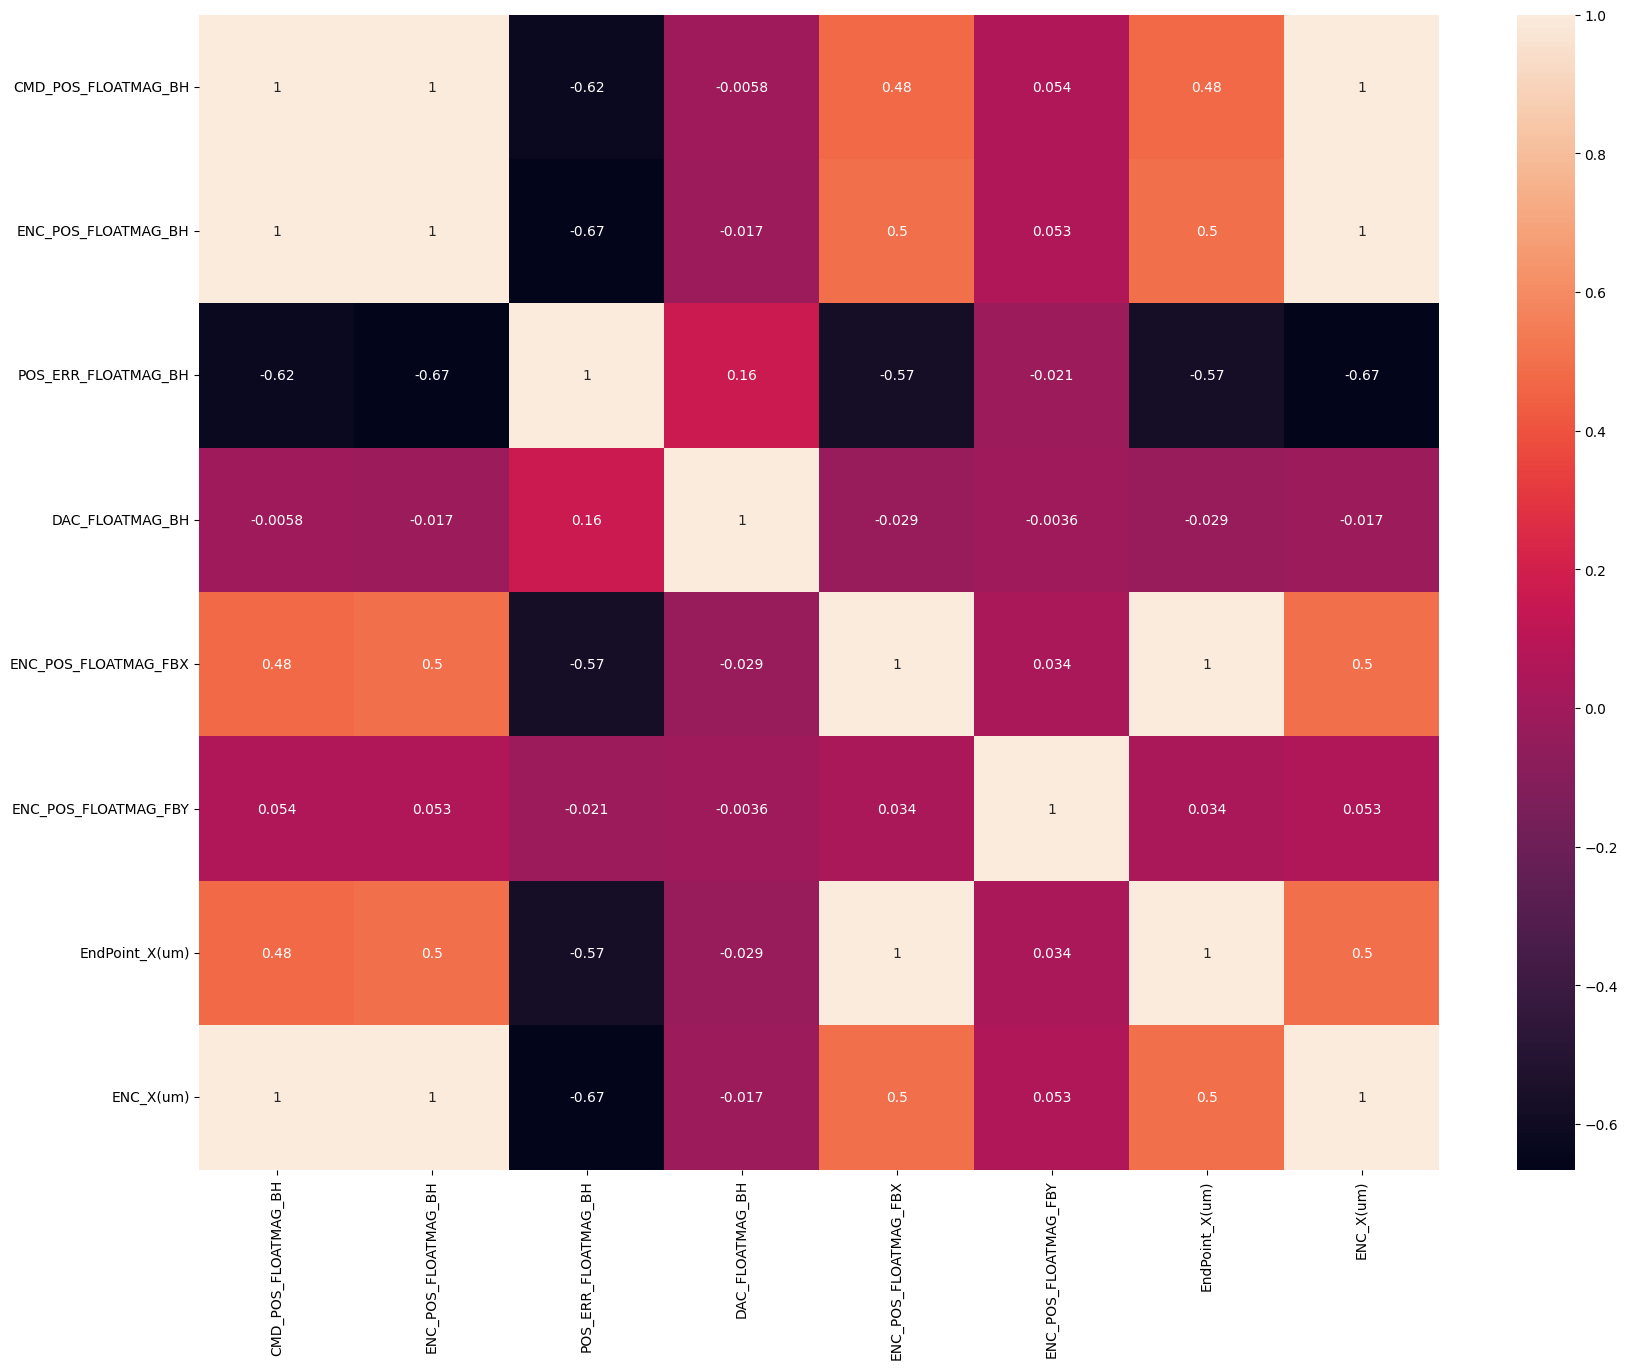

In [11]:
relevant_data = data[['CMD_POS_FLOATMAG_BH', 'ENC_POS_FLOATMAG_BH', 'POS_ERR_FLOATMAG_BH', 'DAC_FLOATMAG_BH', 'ENC_POS_FLOATMAG_FBX', 'ENC_POS_FLOATMAG_FBY', 'EndPoint_X(um)', 'ENC_X(um)']].iloc[839:]
corr = relevant_data.corr()


plt.subplots(figsize=(20,15))

#seaborn correlation matrix of the columns
sns.heatmap(corr, annot=True)
